In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts,GridSearchCV
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [3]:
data=pd.read_csv("/content/advertising.xls")
data

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

In [4]:
y=data["Sales"]
X=data.drop(columns="Sales")
X

TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [5]:
stdsc=StandardScaler()
X=stdsc.fit_transform(X)

In [6]:
X_train,X_test,y_train,y_test= tts(X,y,test_size=0.2,random_state=0)
X_train,X_val,y_train,y_val= tts(X_train,y_train,test_size=0.1,random_state=0)

In [18]:
model=Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation="linear"))
model.add(Dense(32,activation="linear"))
model.add(Dense(1,activation="linear"))

In [19]:
model.compile(optimizer="adam",loss="mae",metrics=["mae"])
result=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=20,verbose=0)

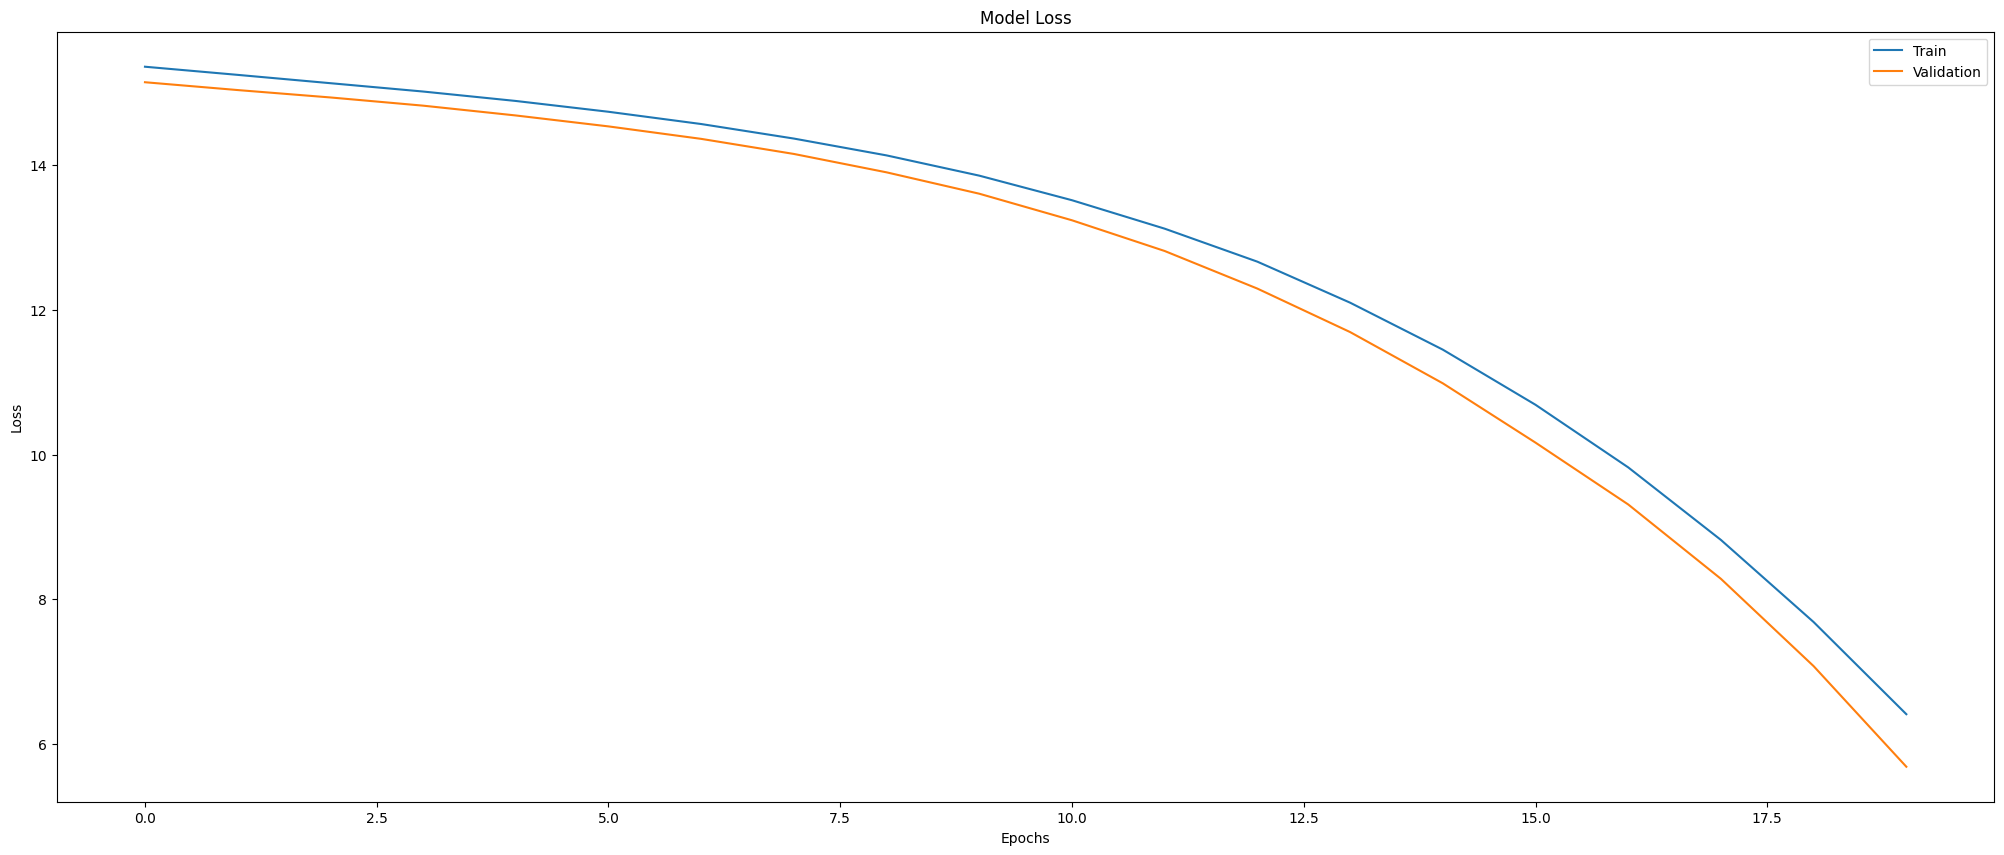

In [20]:
plt.figure(figsize=(25,10))
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()

In [7]:
!pip install scikeras

In [8]:
from scikeras.wrappers import KerasRegressor
from keras.optimizers import Adam

In [9]:
def set_model(units=64,activation="linear",learning_rate=0.01):
  model=Sequential()
  model.add(Dense(units,input_dim=X_train.shape[1],activation=activation))
  model.add(Dense(32,activation="linear"))
  model.add(Dense(1,activation="linear"))
  model.compile(optimizer=Adam(learning_rate=learning_rate),loss="mae",metrics=["mae"])
  return model

In [10]:
parameters={
    "model__units":[16,32,64],
    "model__activation":["linear","relu"],
    "model__learning_rate":[0.001,0.01],
    "epochs":[20,50,100]
}
kr=KerasRegressor(build_fn=set_model,verbose=0)


In [11]:
grid=GridSearchCV(estimator=kr,param_grid=parameters, cv=5)
grid_result=grid.fit(X_train,y_train)
bp=grid_result.best_params_

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

In [12]:
grid_result.best_params_

{'epochs': 100,
 'model__activation': 'relu',
 'model__learning_rate': 0.01,
 'model__units': 16}

In [16]:
bestmodel=set_model(units=bp["model__units"],activation=bp["model__activation"],learning_rate=bp["model__learning_rate"])
result2=bestmodel.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=bp["epochs"],verbose=0)

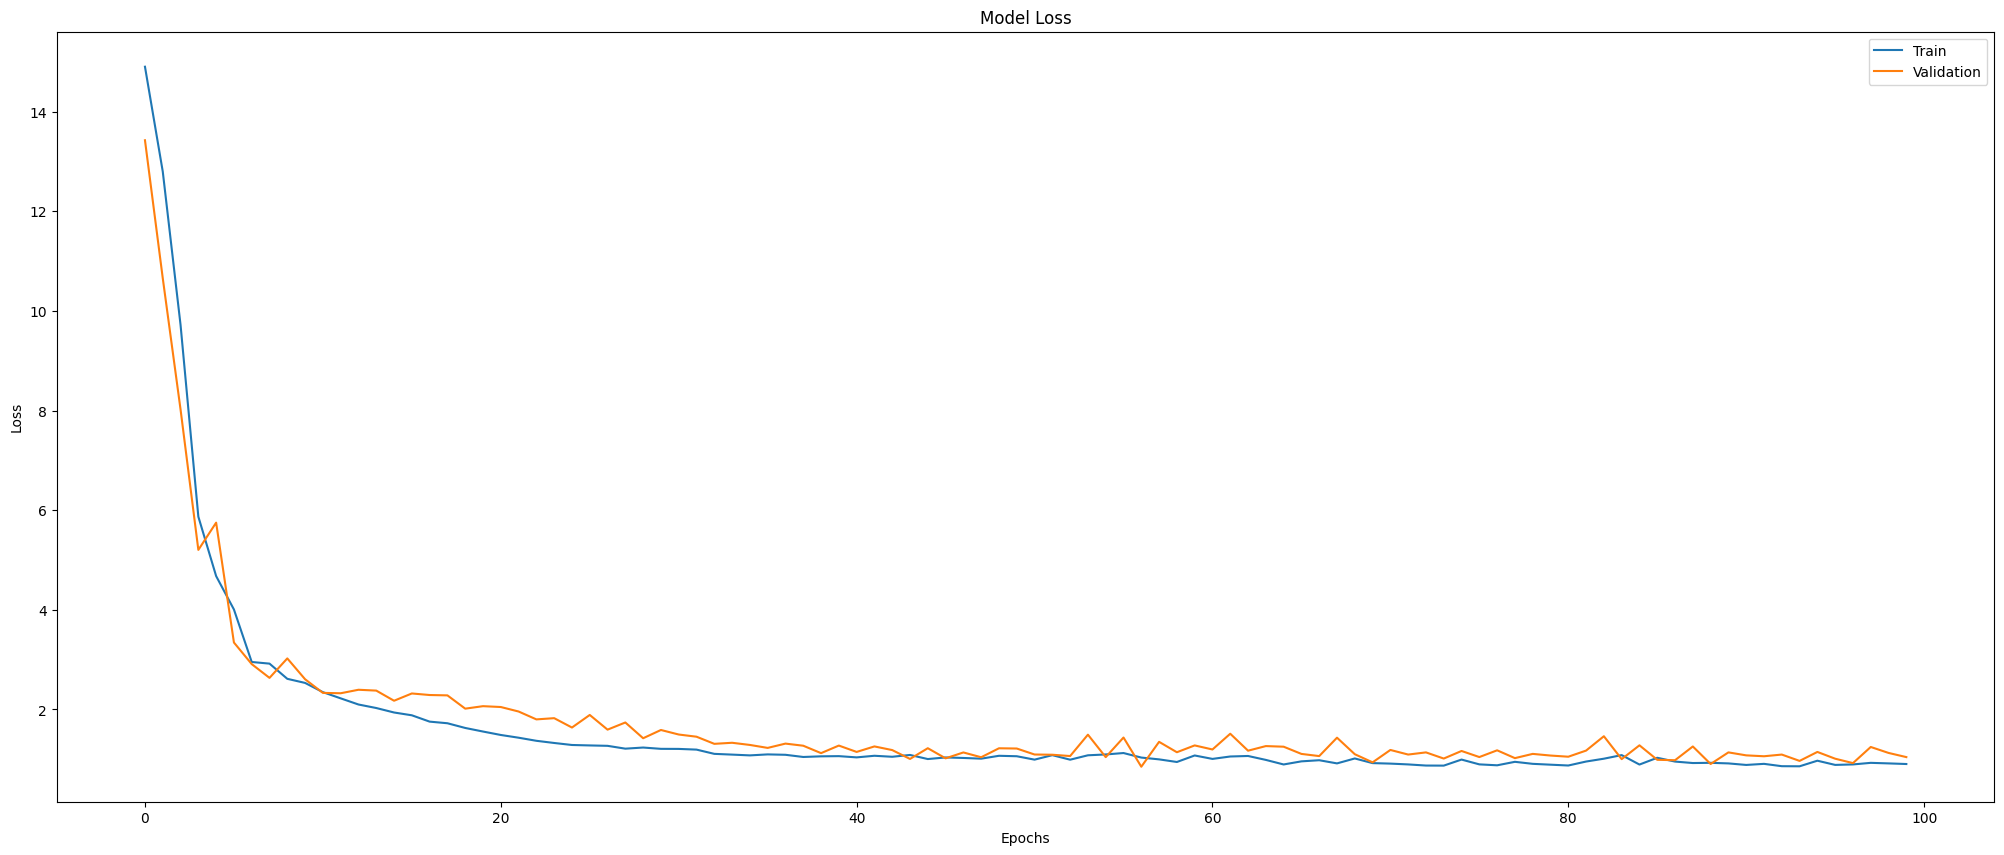

In [17]:
plt.figure(figsize=(25,10))
plt.plot(result2.history["loss"])
plt.plot(result2.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()